# Chemistry

### Imports

In [1]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

import sys
sys.path.append('../../../')

import matplotlib.pyplot as plt

from molgraph.chemistry import MolecularGraphEncoder
from molgraph.chemistry import AtomFeaturizer, BondFeaturizer
from molgraph.chemistry import features
from molgraph.chemistry import transform_ops

### Obtain `rdkit.Chem.Mol` from string (SMILES)

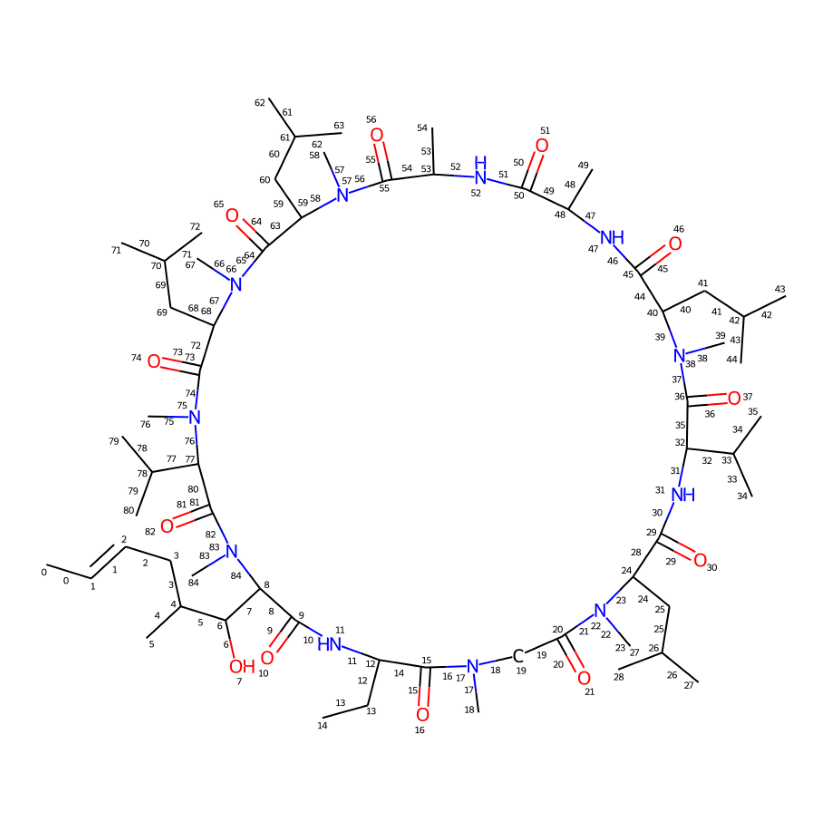

In [5]:
# Obtain a molecule from a SMILES string
# `molecule_from_string` accepts SMILES, InChI or SDF string.
rdkit_mol = transform_ops.molecule_from_string(
    "C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)" + 
    "C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)" + 
    "N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C"
)


# For visualization
image = transform_ops.molecule_to_image(
    rdkit_mol,
    size=(900, 900),
    atom_index=True,
    bond_index=True,
)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(image);

### Obtain atom and bond feature via `features` module

In [10]:
# Obtain RDKit atom and bond via the RDKit API
atom = rdkit_mol.GetAtoms()[0]
bond = rdkit_mol.GetBonds()[0]

# Check available atom features
print(features.atom_features, end="\n\n")

# Check available bond features
print(features.bond_features, end="\n\n")

# Obtain a feature via `atom_features`
print(features.atom_features.get("symbol"), end="\n\n")

# Obtain a feature directly
print(features.Symbol(), end="\n\n")

# Obtain feature (specifically, Symbol) of atom
print(features.Symbol()(atom))



AtomicFeatureFactory(registered_features=['symbol', 'hybridization', 'cip_code', 'chiral_center', 'formal_charge', 'total_num_hs', 'total_valence', 'num_radical_electrons', 'degree', 'aromatic', 'hetero', 'hydrogen_donor', 'hydrogen_acceptor', 'ring_size', 'ring', 'crippen_log_p_contribution', 'crippen_molar_refractivity_contribution', 'tpsa_contribution', 'labute_asa_contribution', 'gasteiger_charge'])

AtomicFeatureFactory(registered_features=['bond_type', 'conjugated', 'rotatable', 'stereo'])

Symbol(allowable_set={'Es', 'O', 'Ba', 'Bi', 'Zn', 'S', 'Cr', 'Sr', 'Se', 'Fr', 'C', 'Pb', 'F', 'Rn', 'Th', 'V', 'Hg', 'K', 'Db', 'Cm', 'Ni', 'Os', 'Ce', 'Er', 'Ta', 'Re', 'Zr', 'Ga', 'Tc', 'Am', 'Pu', 'Fm', 'Xe', 'Li', 'Eu', 'Ac', 'B', 'Mt', 'Ho', 'U', 'Nb', 'Ti', 'Gd', 'Co', 'Ag', 'Cs', 'N', 'Pm', 'Sn', 'Sc', 'Cu', 'Rf', 'Cl', 'P', 'Y', 'Mg', 'At', 'No', 'In', 'Rg', 'Bh', 'Te', 'Po', 'Rh', 'Pd', 'Sb', 'Ge', 'Cf', 'Ru', 'W', 'Ir', 'Br', 'Mo', 'Ca', 'Pr', 'Hs', 'Yb', 'Np', 'Kr', 'Nd', 'Sm', 'S

### Pass arguments to `features`

- `allowable_set` specifies what raw features should be considered
- `oov_size` specifies the number of "slots" dedicated to "out-of-vocabulary" features
- `ordinal` specifies if encoding should be ordinal or not (nominal)

**Note: the features above will only take effect when numerically encoded (via e.g., `AtomFeaturizer`)**

In [17]:
print(features.Symbol())
print(features.Symbol(allowable_set={'C', 'N'}, oov_size=2, ordinal=False))
print('----------------------------')
print(features.BondType())
print(features.BondType(allowable_set={'SINGLE', 'DOUBLE'}, oov_size=1, ordinal=False))
print(features.BondType(allowable_set={'SINGLE', 'DOUBLE'}, oov_size=1, ordinal=True))

Symbol(allowable_set={'Es', 'O', 'Ba', 'Bi', 'Zn', 'S', 'Cr', 'Sr', 'Se', 'Fr', 'C', 'Pb', 'F', 'Rn', 'Th', 'V', 'Hg', 'K', 'Db', 'Cm', 'Ni', 'Os', 'Ce', 'Er', 'Ta', 'Re', 'Zr', 'Ga', 'Tc', 'Am', 'Pu', 'Fm', 'Xe', 'Li', 'Eu', 'Ac', 'B', 'Mt', 'Ho', 'U', 'Nb', 'Ti', 'Gd', 'Co', 'Ag', 'Cs', 'N', 'Pm', 'Sn', 'Sc', 'Cu', 'Rf', 'Cl', 'P', 'Y', 'Mg', 'At', 'No', 'In', 'Rg', 'Bh', 'Te', 'Po', 'Rh', 'Pd', 'Sb', 'Ge', 'Cf', 'Ru', 'W', 'Ir', 'Br', 'Mo', 'Ca', 'Pr', 'Hs', 'Yb', 'Np', 'Kr', 'Nd', 'Sm', 'Sg', 'Cd', 'Fe', 'Tl', 'Lu', 'As', 'Lr', 'Au', 'Na', 'Hf', 'Ra', 'La', 'Pa', 'Tm', 'Al', 'Cn', 'Bk', 'Ne', 'Ar', 'Tb', 'Pt', 'Si', 'Be', 'Mn', 'Dy', 'Rb', 'He', 'H', 'Ds', 'I', 'Md'}, ordinal=False, oov_size=0)
Symbol(allowable_set={'C', 'N'}, ordinal=False, oov_size=2)
----------------------------
BondType(allowable_set={'TRIPLE', 'DOUBLE', 'AROMATIC', 'SINGLE'}, ordinal=False, oov_size=0)
BondType(allowable_set={'DOUBLE', 'SINGLE'}, ordinal=False, oov_size=1)
BondType(allowable_set={'DOUBLE', 'SI

###  `AtomFeaturizer` and `BondFeaturizer` to numerically encode atoms and bonds respectively

In addition to featurizing (numerically encoding) atom and bonds, MolGraph also implements tokenizers (`AtomTokenizer` and `BondTokenizer` respectively), whose output can subsequently be passed to `molgraph.layers.EmeddingLookup`.

In [29]:
atom_encoder = AtomFeaturizer([
    features.Symbol({'C', 'N'}),
    features.Hybridization({'sp', 'sp2', 'sp3'}, oov_size=2)
])
print('   oov encoding:', atom_encoder(atom))

atom_encoder = AtomFeaturizer([
    features.Symbol({'C', 'N'}),
    features.Hybridization({'sp', 'sp2', 'sp3'}, oov_size=0)
])
print('No oov encoding:', atom_encoder(atom))

print('\n---------------------------\n')

# When ordinal = True, make sure allowable_set is an ordered sequence
atom_encoder = AtomFeaturizer([features.Symbol(['O', 'N', 'C'], ordinal=True)])
print('ordinal:', atom_encoder(atom))

atom_encoder = AtomFeaturizer([features.Symbol(['O', 'N', 'C'], ordinal=False)])
print('nominal:', atom_encoder(atom))

   oov encoding: [1. 0. 1. 0. 0. 0. 0.]
No oov encoding: [1. 0. 0. 0. 0.]

---------------------------

ordinal: [1. 1. 1.]
nominal: [1. 0. 0.]


### Custom `features`

In [31]:
# Create custom atomic feature
class MolWeightCategorical(features.AtomicFeature):
    def call(self, atom):
        mass = atom.GetMass()
        if mass < 5:
            return 'atom_mass<5'
        elif mass < 40:
            return '5<atom_mass<40'
        else:
            return '40<atom_mass'
        
print(
    AtomFeaturizer([
        MolWeightCategorical(allowable_set={
            'atom_mass<5', '5<atom_mass<40', '40<atom_mass'})
    ])(atom)
)       
    
class MolWeightFloat(features.AtomicFeature):
    def call(self, atom):
        return atom.GetMass()
    
# Combine new feature with builtin feature
print(
    AtomFeaturizer([
        MolWeightFloat(), 
        features.Symbol({'C', 'O', 'N', 'P', 'S'})
    ])(atom)
)

[0. 1. 0.]
[12.011  1.     0.     0.     0.     0.   ]


### `MolecularGraphEncoder` to encode molecules as graphs (`GraphTensor`)


In [33]:

atom_encoder = AtomFeaturizer([
    features.Symbol(allowable_set={'C', 'N'})
])
bond_encoder = BondFeaturizer([
    features.BondType(allowable_set={'SINGLE', 'DOUBLE'})
])

mol_encoder = MolecularGraphEncoder(
    atom_encoder=atom_encoder,                                    # not default, required
    bond_encoder=bond_encoder,                                    # not default, optional
    positional_encoding_dim=16,                                   # default
    self_loops=False,                                             # default
    molecule_from_string_fn=transform_ops.molecule_from_string    # default
)


print(mol_encoder) # Note the "hierarchical structure": features->featurizer->encoder  

MolecularGraphEncoder(atom_encoder=AtomFeaturizer(features=[Symbol(allowable_set={'C', 'N'}, ordinal=False, oov_size=0)], dtype='float32', ndim=2), bond_encoder=BondFeaturizer(features=[BondType(allowable_set={'DOUBLE', 'SINGLE'}, ordinal=False, oov_size=0)], dtype='float32', ndim=2), positional_encoding_dim=16, self_loops=False)


### `MolecularGraphEncoder` accepts both `rdkit.Chem.Mol` and strings

In [37]:
# Converts rdkit mol to a GraphTensor
graph_tensor = mol_encoder(rdkit_mol)
print(graph_tensor, end='\n\n')

# Converts SMILES (string) to a GraphTensor
graph_tensor = mol_encoder('OCC1OC(C(C1O)O)n1cnc2c1ncnc2N')
print(graph_tensor, end='\n\n')

# Encodes a list of molecules to a GraphTensor
# Uses multiprocessing for speed up 
molecules = [
    'OCC1OC(C(C1O)O)n1cnc2c1ncnc2N',
    'C(C(=O)O)N',
    'C1=CC(=CC=C1CC(C(=O)O)N)O'
]
graph_tensor = mol_encoder(molecules, processes=8)
print(graph_tensor, end='\n\n')

GraphTensor(edge_dst=<tf.Tensor: shape=(170,), dtype=int32>, edge_src=<tf.Tensor: shape=(170,), dtype=int32>, node_feature=<tf.Tensor: shape=(85, 2), dtype=float32>, edge_feature=<tf.Tensor: shape=(170, 2), dtype=float32>, positional_encoding=<tf.Tensor: shape=(85, 16), dtype=float32>, graph_indicator=<tf.Tensor: shape=(85,), dtype=int32>)

GraphTensor(edge_dst=<tf.Tensor: shape=(42,), dtype=int32>, edge_src=<tf.Tensor: shape=(42,), dtype=int32>, node_feature=<tf.Tensor: shape=(19, 2), dtype=float32>, edge_feature=<tf.Tensor: shape=(42, 2), dtype=float32>, positional_encoding=<tf.Tensor: shape=(19, 16), dtype=float32>, graph_indicator=<tf.Tensor: shape=(19,), dtype=int32>)

GraphTensor(node_feature=<tf.RaggedTensor: shape=(3, None, 2), dtype=float32, ragged_rank=1, row_splits_dtype=int32>, edge_feature=<tf.RaggedTensor: shape=(3, None, 2), dtype=float32, ragged_rank=1, row_splits_dtype=int32>, positional_encoding=<tf.RaggedTensor: shape=(3, None, 16), dtype=float32, ragged_rank=1, row_

### Inspect `GraphTensor`

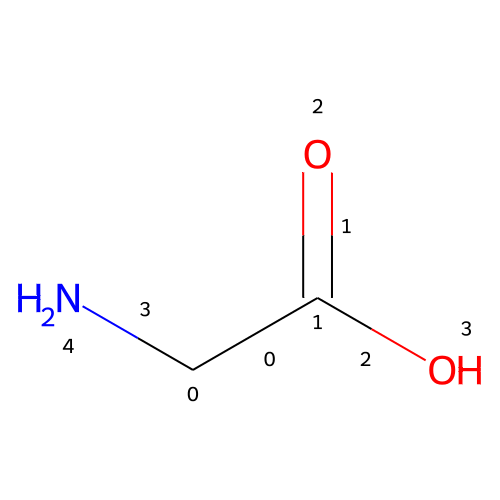

In [44]:
# visualize the second molecule of the GraphTensor as reference
transform_ops.molecule_to_image(
    transform_ops.molecule_from_string('C(C(=O)O)N'), 
    atom_index=True, 
    bond_index=True
)

Inspect the different components of the `GraphTensor` (at index = 1)

In [46]:
index = 1
print(graph_tensor[index], end='\n\n')

print('node_feature:', graph_tensor[index].node_feature, end='\n\n')
print('edge_feature:', graph_tensor[index].edge_feature, end='\n\n')
print('edge_dst:', graph_tensor[index].edge_dst, end='\n\n')
print('edge_src:', graph_tensor[index].edge_src, end='\n\n')

GraphTensor(node_feature=<tf.Tensor: shape=(5, 2), dtype=float32>, edge_feature=<tf.Tensor: shape=(8, 2), dtype=float32>, positional_encoding=<tf.Tensor: shape=(5, 16), dtype=float32>, edge_dst=<tf.Tensor: shape=(8,), dtype=int32>, edge_src=<tf.Tensor: shape=(8,), dtype=int32>, graph_indicator=<tf.Tensor: shape=(5,), dtype=int32>)

node_feature: tf.Tensor(
[[1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]], shape=(5, 2), dtype=float32)

edge_feature: tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]], shape=(8, 2), dtype=float32)

edge_dst: tf.Tensor([0 0 1 1 1 2 3 4], shape=(8,), dtype=int32)

edge_src: tf.Tensor([1 4 0 2 3 1 1 0], shape=(8,), dtype=int32)



Inspect different components of the `GraphTensor` without indexing. I.e., inspect the entire graph of three molecules.

In [49]:
print('node_feature:', graph_tensor.node_feature, end='\n\n')
print('edge_feature:', graph_tensor.edge_feature, end='\n\n')
print('edge_dst:', graph_tensor.edge_dst, end='\n\n')
print('edge_src:', graph_tensor.edge_src, end='\n\n')

node_feature: <tf.RaggedTensor [[[0.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0]], [[1.0, 0.0],
                [1.0, 0.0],
                [0.0, 0.0],
                [0.0, 0.0],
                [0.0, 1.0]], [[1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0],
                              [0.0, 0.0],
                              [0.0, 0.0],
                              [0.0, 1.0],
                              [0.0, 0.0]]]>

edge_feature: <tf.RaggedTensor [[[0.0, 1.0],
  [0.0, 1.0

### Merge `GraphTensor`

Merging the `GraphTensor` via the `merge` method, which basically merges all three molecules. The molecules can be distinguished by the `graph_indicator` component of `GraphTensor`.

In [53]:
graph_tensor = graph_tensor.merge()
print(graph_tensor, end='\n\n')
print('node_feature:', graph_tensor.node_feature, end='\n\n')
print('edge_feature:', graph_tensor.edge_feature, end='\n\n')
print('edge_dst:', graph_tensor.edge_dst, end='\n\n')
print('edge_src:', graph_tensor.edge_src, end='\n\n')
print('graph_indicator:', graph_tensor.graph_indicator)

GraphTensor(node_feature=<tf.Tensor: shape=(37, 2), dtype=float32>, edge_feature=<tf.Tensor: shape=(76, 2), dtype=float32>, positional_encoding=<tf.Tensor: shape=(37, 16), dtype=float32>, edge_dst=<tf.Tensor: shape=(76,), dtype=int32>, edge_src=<tf.Tensor: shape=(76,), dtype=int32>, graph_indicator=<tf.Tensor: shape=(37,), dtype=int32>)

node_feature: tf.Tensor(
[[0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]], shape=(37, 2), dtype=float32)

edge_feature: tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 

### Separate the `GraphTensor`

To separate the three molecules (namely, to encode the nested components of `GraphTensor` as `tf.RaggedTensor`s) back to what it was originally, the `separate` method can be utilized.

In [54]:
graph_tensor = graph_tensor.separate()
print(graph_tensor, end='\n\n')
print('node_feature:', graph_tensor.node_feature, end='\n\n')
print('edge_feature:', graph_tensor.edge_feature, end='\n\n')
print('edge_dst:', graph_tensor.edge_dst, end='\n\n')
print('edge_src:', graph_tensor.edge_src, end='\n\n')

GraphTensor(node_feature=<tf.RaggedTensor: shape=(3, None, 2), dtype=float32, ragged_rank=1, row_splits_dtype=int32>, edge_feature=<tf.RaggedTensor: shape=(3, None, 2), dtype=float32, ragged_rank=1, row_splits_dtype=int32>, positional_encoding=<tf.RaggedTensor: shape=(3, None, 16), dtype=float32, ragged_rank=1, row_splits_dtype=int32>, edge_dst=<tf.RaggedTensor: shape=(3, None), dtype=int32, ragged_rank=1, row_splits_dtype=int32>, edge_src=<tf.RaggedTensor: shape=(3, None), dtype=int32, ragged_rank=1, row_splits_dtype=int32>)

node_feature: <tf.RaggedTensor [[[0.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0],
  [1.0, 0.0],
  [0.0, 1.0]], [[1.0, 0.0],
                [1.0, 0.0],
                [0.0, 0.0],
                [0.0, 0.0],
                [0.0, 1.0]], [[1.0, 0.0],
                              